## <center> Assignment 7</center>

### <center> Gaukhar Dauzhan</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following ODE:
    $$\frac{d^2y}{dx^2}=-1001\frac{dy}{dx}-1000y$$
has the following initial conditions $$y(0)=1$$  $$y'(0)=0$$ in the range x=[0, 5]

We will solve it analytically and numberically using<br>
a) explicit Euler method<br>
b) Heun's method<br>
c) midpoint method<br>
d) implicit Euler method<br>

### Analitycal solution:
Characteristic equation: $$r^2+1001r+1000=0$$ has the following roots: r1=-1000 and r2=-1.<br>
Then the solution is of the form: $$y=c_1e^{-1000x}+c_2e^{-x}$$
$$y(0) = 1 -> c1+c2=1$$
$$y'(0)=0 -> c2=-1000c1$$ 
The exact solution then becomes $$y=\frac{1000}{999}e^{-x}-\frac{1}{999}e^{-1000x}$$

In [2]:
def exact_sol(x):
    return (1000/999)*np.exp(-x)-(1/999)*np.exp(-1000*x)

In [3]:
xn=5; x0=0; y0=1; z0=0; h=0.0001
x = np.arange(x0,xn,h)
y = exact_sol(x)
n=y.size

### Numerical solutions
In order to calculate the solution using above methods, we need to transform a 2nd-order ODE into a system of two 1st order ODEs 

$$\frac{dy}{dx}=z=f^y(x, y, z)$$
$$\frac{dz}{dx}=-1001z-1000y=f^z(x, y, z),$$ where y(0)=1 and z(0)=0

In [4]:
def fz(y, z):
    return -1001*z-1000*y

In [5]:
def fy(z):
    return z

#### (a) explicit Euler method

$$ y_{i+1}=y_i+f^{y}(x_i,y_i,z_i)h $$
$$ z_{i+1}=z_i+f^{z}(x_i,y_i,z_i)h $$

In [6]:
def exEuler(h, n):
    x=np.zeros(n, float)
    y=np.zeros(n, float)
    z=np.zeros(n, float)
    x[0]=x0
    y[0]=y0
    z[0]=z0
    for i in range (n-1):
        y[i+1]=y[i]+h*fy(z[i])
        z[i+1]=z[i]+h*fz(y[i], z[i])
        x[i+1]=x[i]+h
    return y

#### (b) Heun's method

$$ y_{i+1}=y_i+\frac{k_1^y+k_2^y}{2}h $$
$$ z_{i+1}=z_i+\frac{k_1^z+k_2^z}{2}h $$
<br>
$$ k_1^y=f^y(x[i], y[i], z[i]),  k_2^y=f^y(x[i]+h, y[i]+k_1^yh, z[i]+k_1^zh) $$
$$ k_1^z=f^z(x[i], y[i], z[i]), k_2^z=f^z(x[i]+h, y[i]+k_1^yh, z[i]+k_1^zh) $$


In [7]:
def heun(h, n):
    x=np.zeros(n, float)
    y=np.zeros(n, float)
    z=np.zeros(n, float)
    x[0]=x0
    y[0]=y0
    z[0]=z0
    for i in range (n-1):
        k1y=fy(z[i])
        k1z=fz(y[i], z[i])
        k2y=fy(z[i]+k1z*h)
        k2z=fz(y[i]+k1y*h, z[i]+k1z*h)
        y[i+1]=y[i]+(k1y+k2y)*h/2
        z[i+1]=z[i]+(k1z+k2z)*h/2
        x[i+1]=x[i]+h
    return y

#### (c) Midpoint method

$$ y_{i+\frac{1}{2}}=y_i+fy(x_i, y_i, z_i)\frac{h}{2} $$
$$ z_{i+\frac{1}{2}}=z_i+fz(x_i, y_i, z_i)\frac{h}{2} $$
$$ y_{i+1}=y_i+fy(x_{i+\frac{1}{2}}, y_{i+\frac{1}{2}}, z_{i+\frac{1}{2}} )h $$
$$ z_{i+1}=z_i+fz(x_{i+\frac{1}{2}}, y_{i+\frac{1}{2}}, z_{i+\frac{1}{2}} )h $$
<br>

In [8]:
def midpoint(h, n):
    x=np.zeros(n, float)
    y=np.zeros(n, float)
    z=np.zeros(n, float)
    x[0]=x0
    y[0]=y0
    z[0]=z0
    for i in range (n-1):
        xhalf=x[i]+h/2
        yhalf=y[i]+fy(z[i])*(h/2)
        zhalf=z[i]+fz(y[i], z[i])*(h/2)
        y[i+1]=y[i]+fy(zhalf)*h
        z[i+1]=z[i]+fz(yhalf, zhalf)*h
        x[i+1]=x[i]+h
    return y

#### (d) implicit Euler method

$$ y_{i+1}=y_i+f^{y}(x_{i+1},y_{i+1},z_{i+1})h $$
$$ z_{i+1}=z_i+f^{z}(x_{i+1},y_{i+1},z_{i+1})h $$
After substitution we get:
$$ y_{i+1}=y_i+z_{i+1}h $$
$$ z_{i+1}=z_i-1001z_{i+1}h-1000y_{i+1}h=z_i-1001z_{i+1}h-1000y_ih-1000z_{i+1}h^2 $$
Then
$$ z_{i+1}(1+1001h+1000h^2)=z_i-1000y_ih $$
$$ z_{i+1}=\frac{z_i-1000y_ih}{1+1001h+1000h^2} $$

In [9]:
def imEuler(h, n):
    x=np.zeros(n, float)
    y=np.zeros(n, float)
    z=np.zeros(n, float)
    x[0]=x0
    y[0]=y0
    z[0]=z0
    for i in range (n-1):
        z[i+1]=(z[i]-1000*y[i]*h)/(1+1001*h+1000*h**2)
        y[i+1]=y[i]+z[i+1]*h
        x[i+1]=x[i]+h
    return y

### Plotting graphs

In [10]:
def plotFunction(h, n, function, fname, i):
    y1 = function(h, n)
    plt.subplot(i)
    plt.plot(x, y, 'r--')
    plt.plot(x, y1, 'b:')
    plt.title(fname)
    plt.xlabel("x")
    plt.ylabel("y")

In [11]:
fnum=4
functions=np.array([exEuler, heun, midpoint, imEuler])
fnames=(["Explicit Euler method",  "Heun's method", "Midpoint method", "Implicit Euler method"])


For the solution to be stable, the following condition myst be satisfied:
$$|1-ah|<1$$, or $$h < \frac{2}{a}$$
In our case a=1000, so $$h<0.002$$

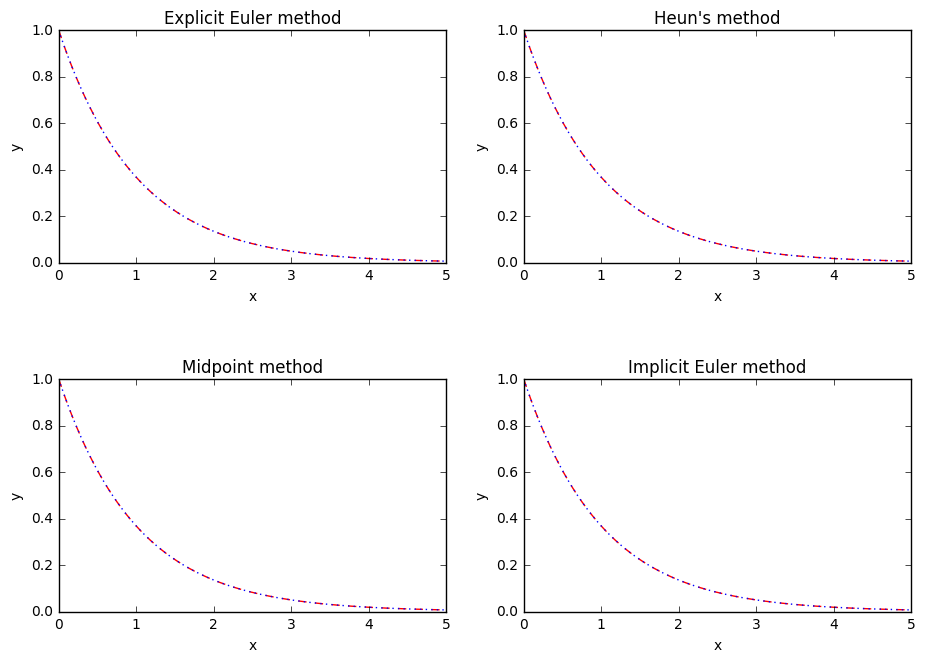

In [12]:
plt.figure(figsize=(11,12))
plt.subplots_adjust(hspace=.5)
for i in range (fnum):
    plotFunction(h, n, functions[i], fnames[i], 321+i)
plt.show()

In [13]:
xn1=0.002; h=0.0001
x = np.arange(x0,xn1,h)
y = exact_sol(x)
n=y.size

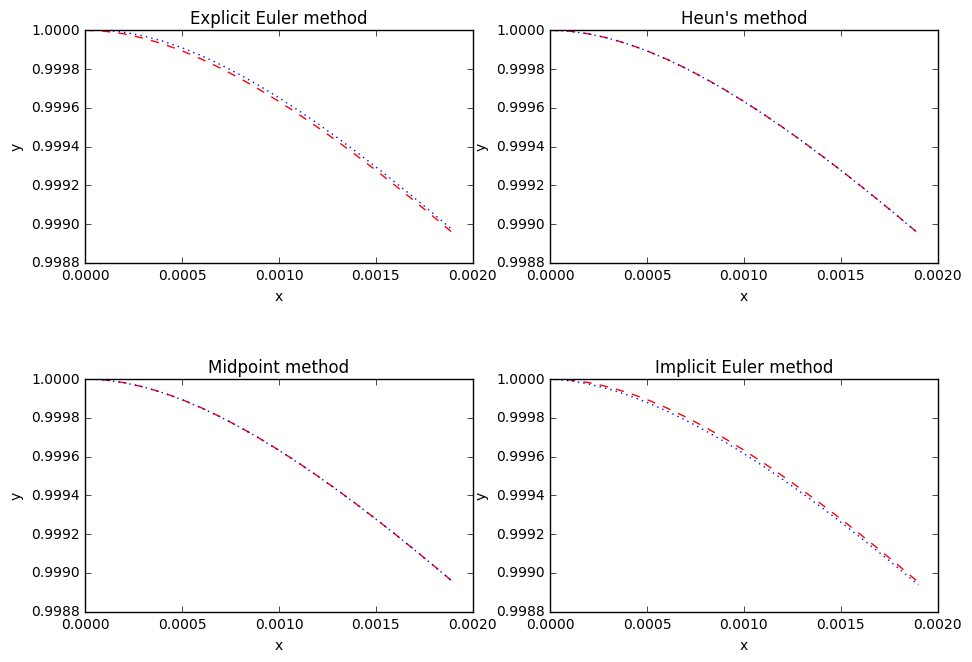

In [14]:
plt.figure(figsize=(11,12))
plt.subplots_adjust(hspace=.5)
for i in range (fnum):
    plotFunction(h, n, functions[i], fnames[i], 321+i)
plt.show()

From the graphs above it can be seen that solutions of all methods are accurate enough, even for a transient part

Now we will analyze dependency of global error on the value of stepsize

In [15]:
def deviation(y_exact, y_est):
    return np.sum(abs(y_exact-y_est))/y_exact.size

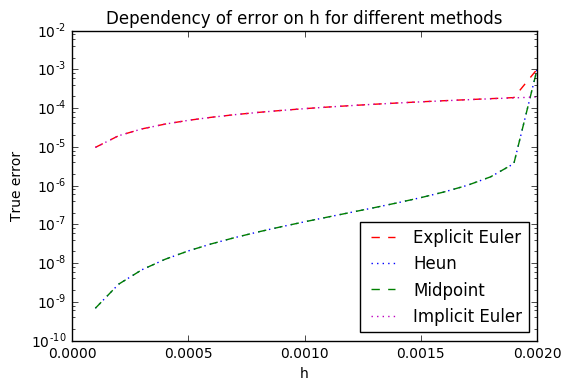

In [16]:
stepsizes=np.arange(0.0001, 0.0021, 0.0001)
er_exEuler = []
er_heun = []
er_midpoint = []
er_imEuler = []
for h in stepsizes:
    x=np.arange(x0, xn, h)
    y_exact=exact_sol(x) 
    er_exEuler.append(deviation(y_exact, exEuler(h, x.size)))
    er_heun.append(deviation(y_exact, heun(h, x.size)))
    er_midpoint.append(deviation(y_exact, midpoint(h, x.size)))
    er_imEuler.append(deviation(y_exact, imEuler(h, x.size)))
plt.plot(stepsizes,er_exEuler, 'r--',label='Explicit Euler') 
plt.plot(stepsizes,er_heun, 'b:',label='Heun') 
plt.plot(stepsizes,er_midpoint, 'g--',label='Midpoint') 
plt.plot(stepsizes,er_imEuler, 'm:', label='Implicit Euler') 
plt.xlabel('h')
plt.ylabel('True error')
plt.legend(loc='lower right')
plt.title('Dependency of error on h for different methods')
plt.yscale('log')
plt.show() 

It can be seen from the graph that as the stepsize increases, global error increases as well. Before the stability limit h Heun and Midpoint methods show better performance, i.e, total error is small in comparison to Euler methods. Their computational cost is higher than explicit Euler's method, but this is the price for the better accuracy. However, having reached the stability bounder h, all graphs of explicit methods increase dramatically and become unstable, i.e. total error becomes extremely large. Implicit Euler's method, in its turn, does not change its behavior, it is unconditionally stable, although a price is paid in the form of additional calculations. In our case the solution was not complicated only due to linearity of the system. 

So, implicit methods should be chosen in case bigger stepsize is required in order to reduce computational cost (if the range is big). Otherwise, explicit methods, particularly Heun and midpoint methods should be chosen, since they are more accurate and require less computations.